In [5]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plot2d
from models import bistream_se_unet
from dataloader import load_sample
%matplotlib inline

In [6]:
model_weights = 'models/Bi-stream-SE_U-Net.h5'
model = bistream_se_unet()
model.load_weights(model_weights)

# Prediction test on a field seismic image extracted from validation data

In [7]:
val_path = "data/validation/"
shape = 128, 128, 128
val_seism = load_sample(val_path + 'seis/' + '0.dat', shape=shape, norm=True)
val_pred = model.predict(val_seism[np.newaxis, ..., np.newaxis], verbose=1)
val_pred = (val_pred[0, :, :, :, 0] >= 0.5).astype(np.float32)
val_fault = load_sample(val_path + 'fault/' + '0.dat', shape=shape, norm=False)

1/1 [==============================] - 4s 4s/step


In [8]:
slice = 50
seis_slice = val_seism[slice, :, :]
fault_slice = val_fault[slice, :, :]
pred_slice = val_pred[slice, :, :]

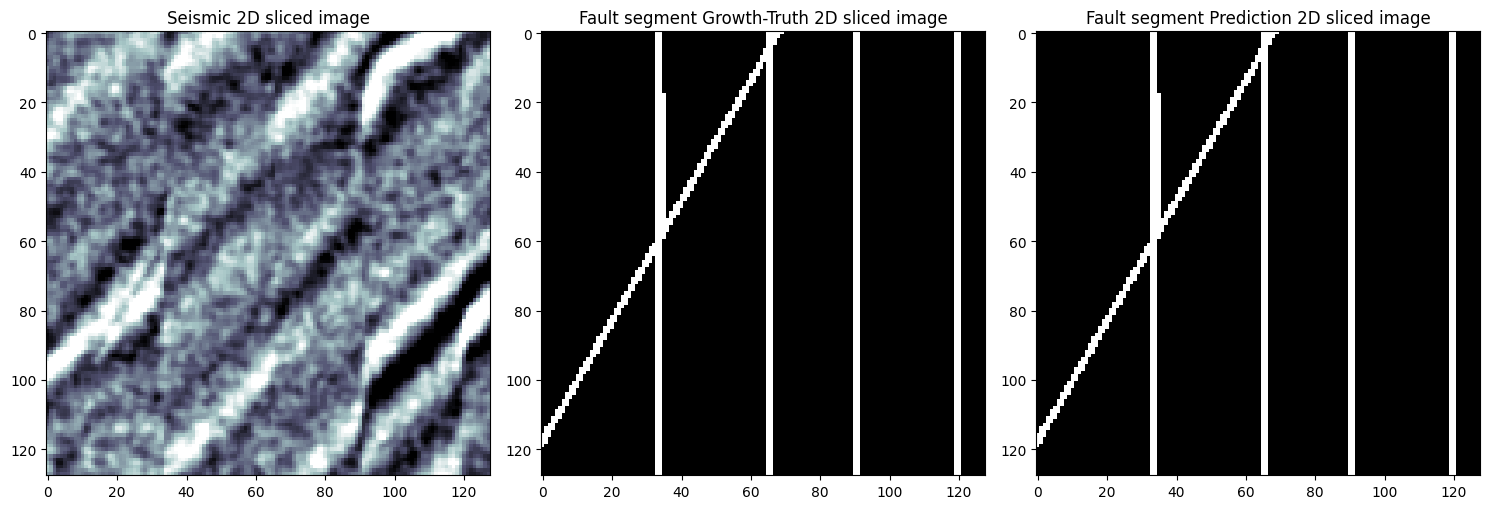

In [9]:
plot2d(seis_slice, fault_slice, pred_slice)

# Prediction test on a field seismic image extracted from the Netherlands off-shore F3 block seismic data

In [ ]:
f3d_path = "data/prediction/f3d/"
shape = 512, 384, 128
f3d_seism = load_sample(f3d_path + 'fpx.dat', shape=shape, norm=True)
f3d_pred = model.predict(f3d_seism[np.newaxis, ..., np.newaxis], verbose=1)

In [15]:
f3d_pred = f3d_pred[0, :, :, :, 0]
f3d_fault = load_sample(f3d_path + 'gxl.dat', shape=shape, norm=False)

ft = np.transpose(f3d_pred)
ft.tofile("data/prediction/f3d/" + "fp.dat", format="%4")

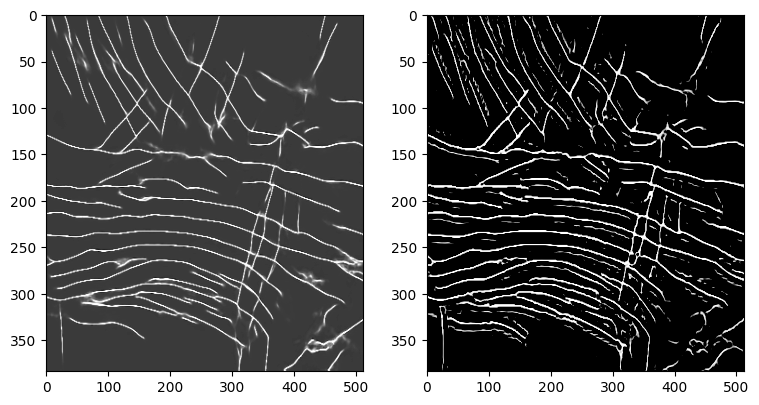

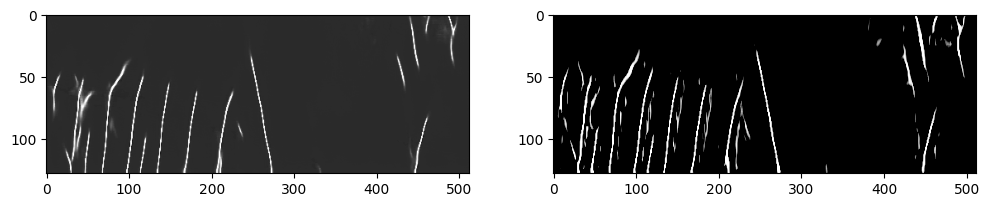

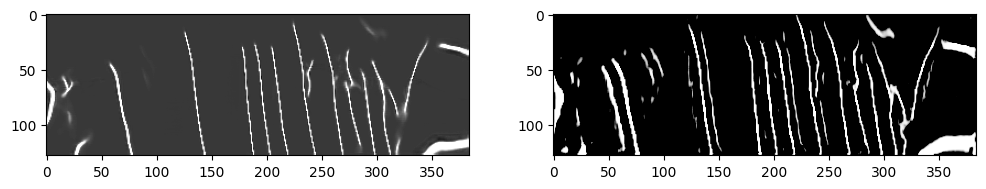

In [16]:

k1, k2, k3 = 99, 29, 29
f3d_seism1 = f3d_seism[k1, :, :]
gy1 = f3d_pred[k1, :, :]
f3d_seism2 = f3d_seism[:, k2, :]
gy2 = f3d_pred[:, k2, :]
f3d_seism3 = f3d_seism[:, :, k3]
gy3 = f3d_pred[:, :, k3]

#xline slice
fig = plt.figure(figsize=(9, 9))
p1 = plt.subplot(1, 2, 1)
p1.imshow(f3d_seism1, aspect=1.5, cmap=plt.cm.gray)
p2 = plt.subplot(1, 2, 2)
p2.imshow(gy1, aspect=1.5, interpolation="bilinear", vmin=0.4, vmax=1.0, cmap=plt.cm.gray)

#inline slice
fig = plt.figure(figsize=(12, 12))
p1 = plt.subplot(1, 2, 1)
p1.imshow(f3d_seism2, aspect=1.5, cmap=plt.cm.gray)
p2 = plt.subplot(1, 2, 2)
p2.imshow(gy2, aspect=1.5, interpolation="bilinear", vmin=0.4, vmax=1.0, cmap=plt.cm.gray)

#time slice
fig = plt.figure(figsize=(12, 12))
p1 = plt.subplot(1, 2, 1)
p1.imshow(f3d_seism3, cmap=plt.cm.gray)
p2 = plt.subplot(1, 2, 2)
p2.imshow(gy3, interpolation="bilinear", vmin=0.4, vmax=1.0, cmap=plt.cm.gray)